In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/earthquake_1995-2023.csv")
df.head()

,title,magnitude,date_time,cdi,mmi,alert,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude,location,continent,country
0,"M 6.5 - 42 km W of Sola, Vanuatu",6.5,16-08-2023 12:47,7,4,green,0,657,us,114,7.177000,25.0,mww,192.955,-13.8814,167.1580,"Sola, Vanuatu",NaN,Vanuatu
1,"M 6.5 - 43 km S of Intipucá, El Salvador",6.5,19-07-2023 00:22,8,6,yellow,0,775,us,92,0.679000,40.0,mww,69.727,12.8140,-88.1265,"Intipucá, El Salvador",NaN,NaN
2,"M 6.6 - 25 km ESE of Loncopué, Argentina",6.6,17-07-2023 03:05,7,5,green,0,899,us,70,1.634000,28.0,mww,171.371,-38.1911,-70.3731,"Loncopué, Argentina",South America,Argentina
3,"M 7.2 - 98 km S of Sand Point, Alaska",7.2,16-07-2023 06:48,6,6,green,1,860,us,173,0.907000,36.0,mww,32.571,54.3844,-160.6990,"Sand Point, Alaska",NaN,NaN
4,M 7.3 - Alaska Peninsula,7.3,16-07-2023 06:48,0,5,NaN,1,820,at,79,0.879451,172.8,Mi,21.000,54.4900,-160.7960,Alaska Peninsula,NaN,NaN


In [ ]:
df.columns

Index(['title', 'magnitude', 'date_time', 'cdi', 'mmi', 'alert', 'tsunami',
       'sig', 'net', 'nst', 'dmin', 'gap', 'magType', 'depth', 'latitude',
       'longitude', 'location', 'continent', 'country'],
      dtype='object')

title: title name given to the earthquake

magnitude: The magnitude of the earthquake

date_time: date and time

cdi: The maximum reported intensity for the event range

mmi: The maximum estimated instrumental intensity for the event

alert: The alert level - “green”, “yellow”, “orange”, and “red”

tsunami: "1" for events in oceanic regions and "0" otherwise

sig: A number describing how significant the event is. Larger numbers indicate a more significant event. This value is determined on a number of factors, including: magnitude, maximum MMI, felt reports, and estimated impact

net: The ID of a data contributor. Identifies the network considered to be the preferred source of information for this event.

nst: The total number of seismic stations used to determine earthquake location.

dmin: Horizontal distance from the epicenter to the nearest station

gap: The largest azimuthal gap between azimuthally adjacent stations (in degrees). In general, the smaller this number, the more reliable is the calculated horizontal position of the earthquake. Earthquake locations in which the azimuthal gap exceeds 180 degrees typically have large location and depth uncertainties

magType: The method or algorithm used to calculate the preferred magnitude for the event

depth: The depth where the earthquake begins to rupture

latitude / longitude: coordinate system by means of which the position or location of any place on Earth's surface can be determined and described

location: location within the country

continent: continent of the earthquake hit country

country: affected country

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      1000 non-null   object 
 1   magnitude  1000 non-null   float64
 2   date_time  1000 non-null   object 
 3   cdi        1000 non-null   int64  
 4   mmi        1000 non-null   int64  
 5   alert      449 non-null    object 
 6   tsunami    1000 non-null   int64  
 7   sig        1000 non-null   int64  
 8   net        1000 non-null   object 
 9   nst        1000 non-null   int64  
 10  dmin       1000 non-null   float64
 11  gap        1000 non-null   float64
 12  magType    1000 non-null   object 
 13  depth      1000 non-null   float64
 14  latitude   1000 non-null   float64
 15  longitude  1000 non-null   float64
 16  location   994 non-null    object 
 17  continent  284 non-null    object 
 18  country    651 non-null    object 
dtypes: float64(6), int64(5), object(8)
memory usage: 

In [ ]:
df['date_time'] = pd.to_datetime(df['date_time'])

<ipython-input-5-54f94f09751c>:1: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['date_time'] = pd.to_datetime(df['date_time'])


In [ ]:
df['month'] = pd.to_datetime(df['date_time']).dt.month
df['year'] = pd.to_datetime(df['date_time']).dt.year

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   title      1000 non-null   object        
 1   magnitude  1000 non-null   float64       
 2   date_time  1000 non-null   datetime64[ns]
 3   cdi        1000 non-null   int64         
 4   mmi        1000 non-null   int64         
 5   alert      449 non-null    object        
 6   tsunami    1000 non-null   int64         
 7   sig        1000 non-null   int64         
 8   net        1000 non-null   object        
 9   nst        1000 non-null   int64         
 10  dmin       1000 non-null   float64       
 11  gap        1000 non-null   float64       
 12  magType    1000 non-null   object        
 13  depth      1000 non-null   float64       
 14  latitude   1000 non-null   float64       
 15  longitude  1000 non-null   float64       
 16  location   994 non-null    object        
 

<Axes: xlabel='magnitude', ylabel='count'>

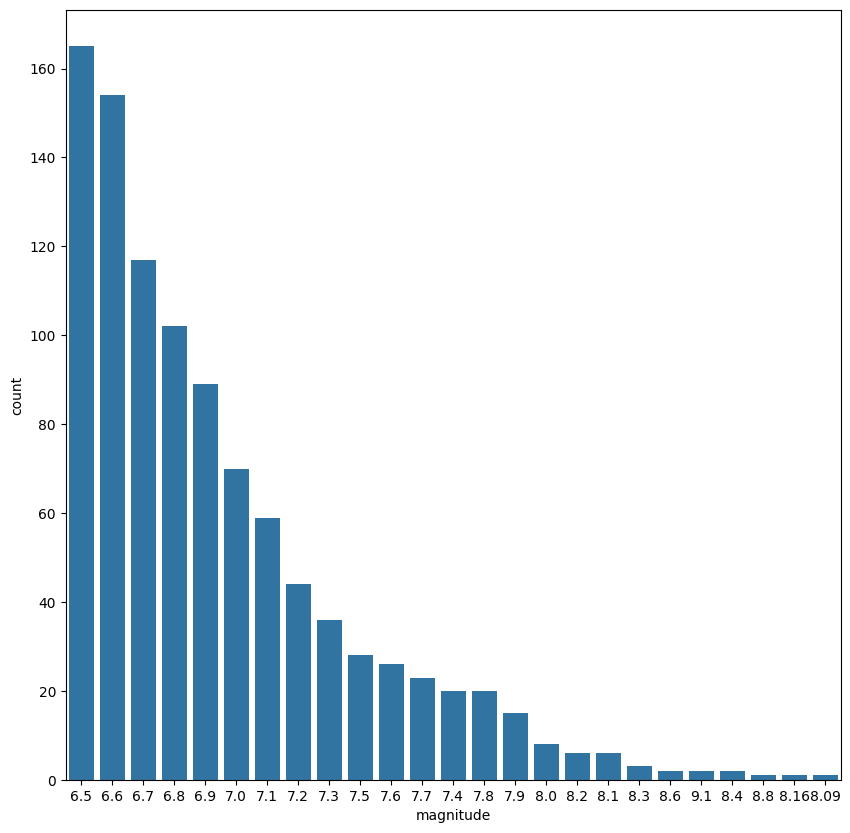

In [ ]:
# earthquake by magnitude

plt.figure(figsize = (10,10))
sns.countplot(data = df , x = 'magnitude' , order = df['magnitude'].value_counts().index)

6.5 magnitude has recorded in highest number of events, followed by 6.6, 6.7, 6.8, 6.9, 7.0, and so on

<Axes: xlabel='year', ylabel='count'>

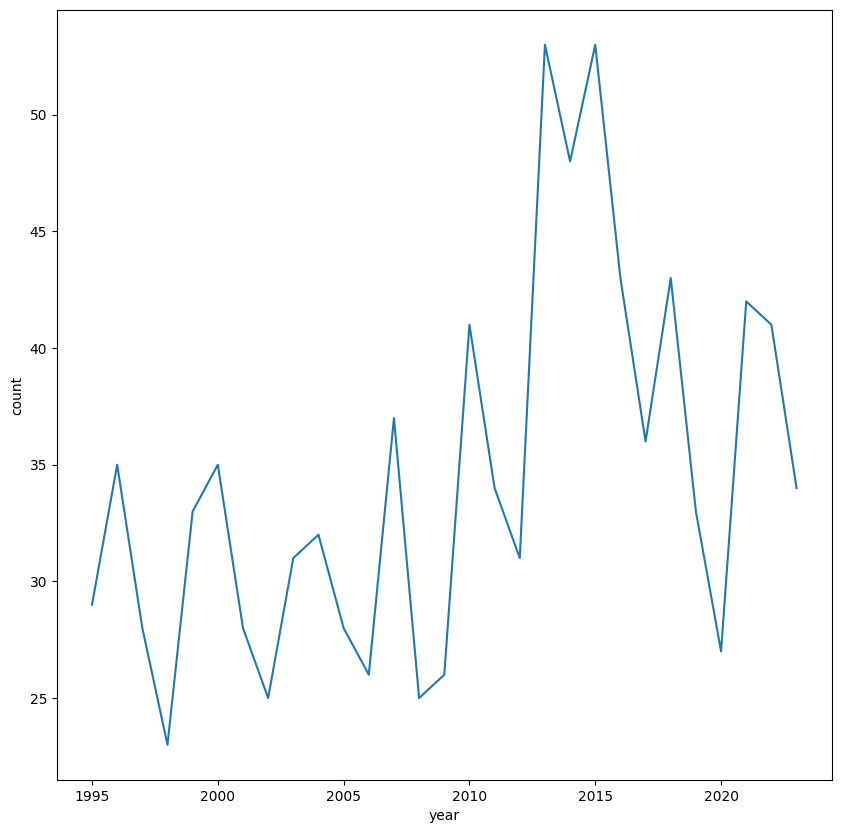

In [ ]:
# earthquake by year

plt.figure(figsize = (10,10))
sns.lineplot(data = df['year'].value_counts())

No of eartquakes event was fairly high in 2013, 2014 & 2015

<Axes: xlabel='month', ylabel='count'>

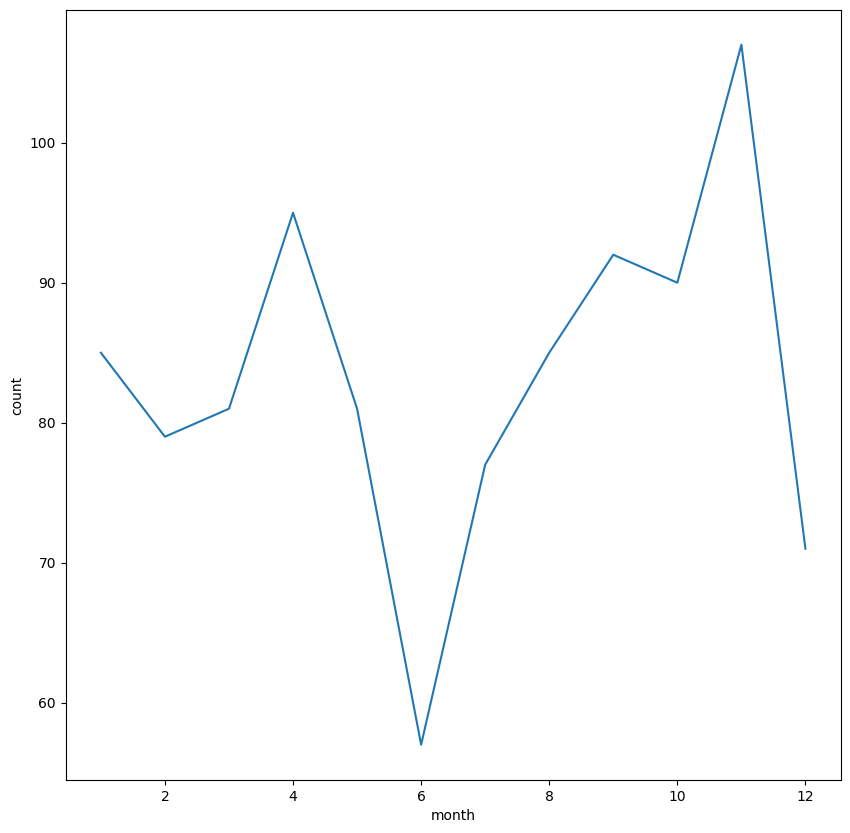

In [ ]:
# earthquake by month

plt.figure(figsize = (10,10))
sns.lineplot(data = df['month'].value_counts())

November was the month when most eartquakes has occured

<Axes: xlabel='net', ylabel='count'>

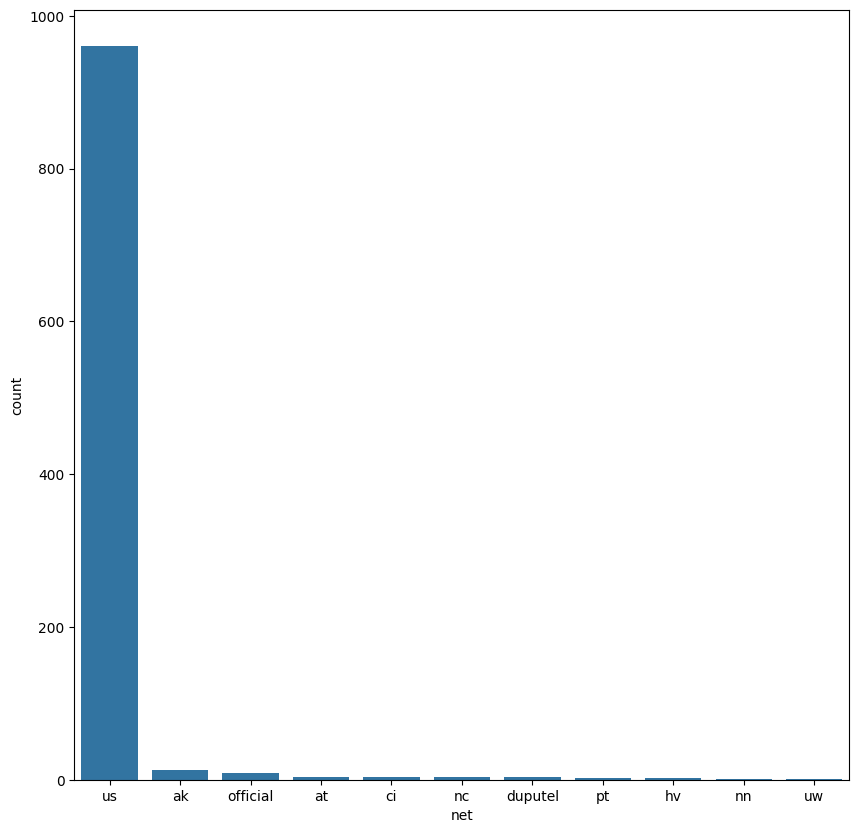

In [ ]:
# data contributors

plt.figure(figsize = (10,10))
sns.countplot(data = df , x = 'net' , order = df['net'].value_counts().index)

US is preferred data contributor of eartquake data

<Axes: xlabel='magType', ylabel='count'>

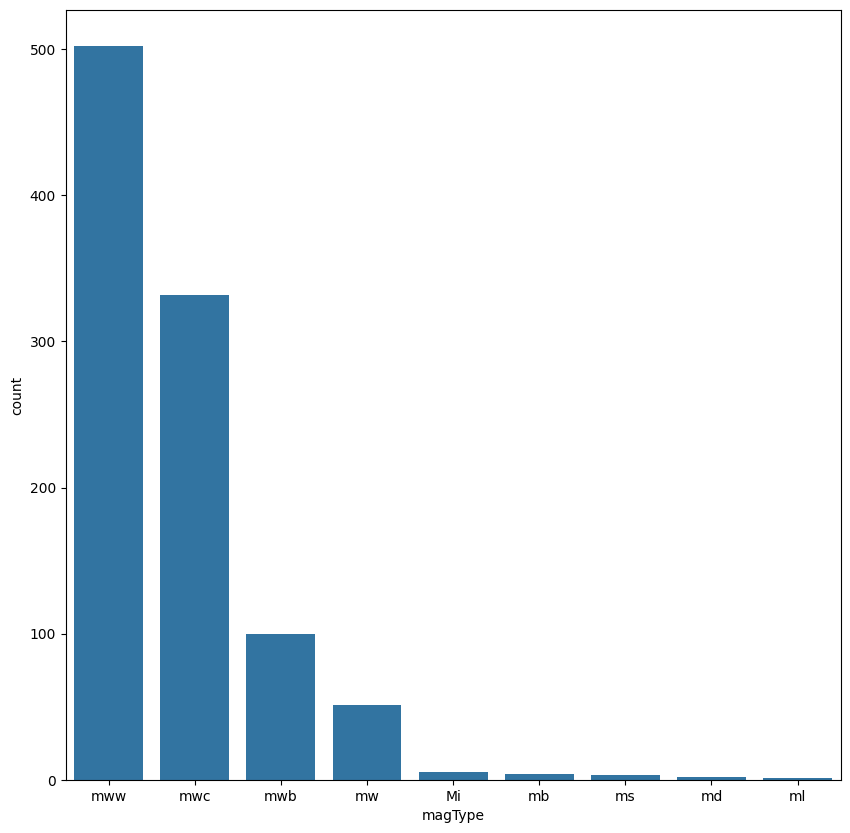

In [ ]:
# magnitude type

plt.figure(figsize = (10,10))
sns.countplot(data = df , x = 'magType' , order = df['magType'].value_counts().index)

Mww is the most widely used type of magnitude measurement

<ipython-input-16-d11a3fcbe8c9>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['sig'])


<Axes: xlabel='sig', ylabel='Density'>

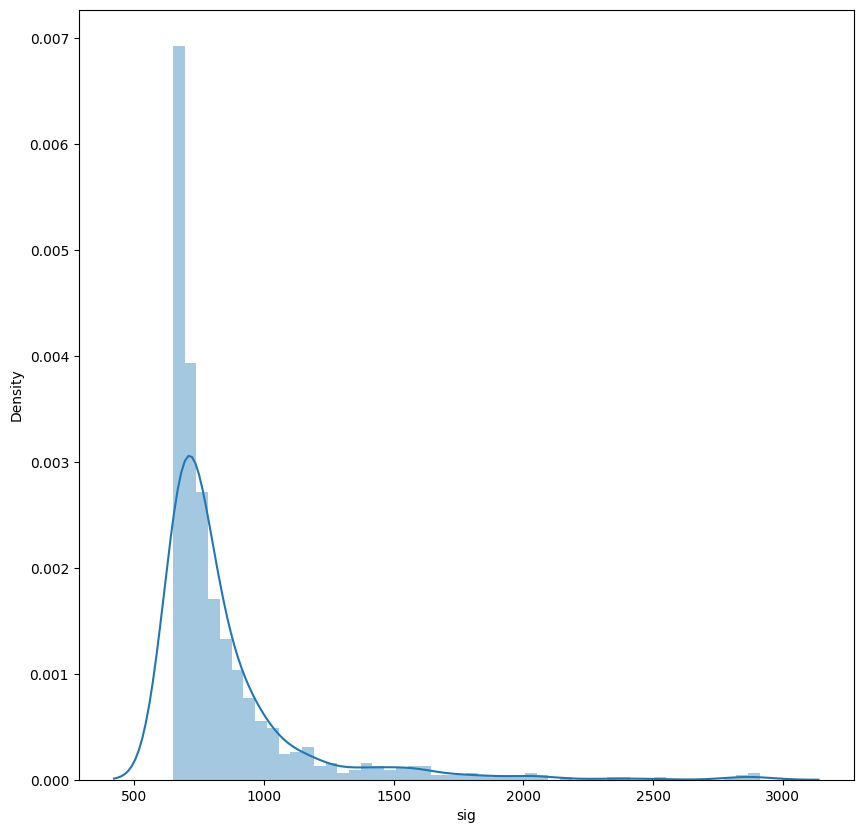

In [ ]:
# Significance - distribution

plt.figure(figsize= (10,10))
sns.distplot(df['sig'])

Most of the eartquake has the significance below 1000

<ipython-input-17-4d976b71d47a>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['depth'])


<Axes: xlabel='depth', ylabel='Density'>

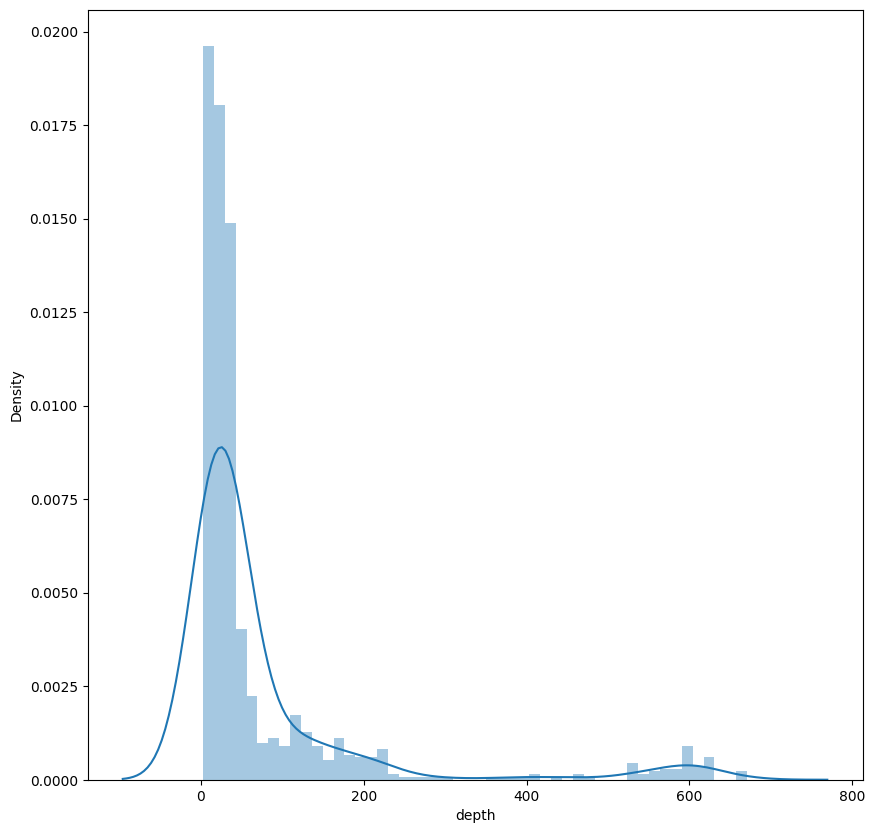

In [ ]:
# Depth - distribution

plt.figure(figsize= (10,10))
sns.distplot(df['depth'])

Most of the eartquake has depth below 100

<Axes: xlabel='tsunami', ylabel='count'>

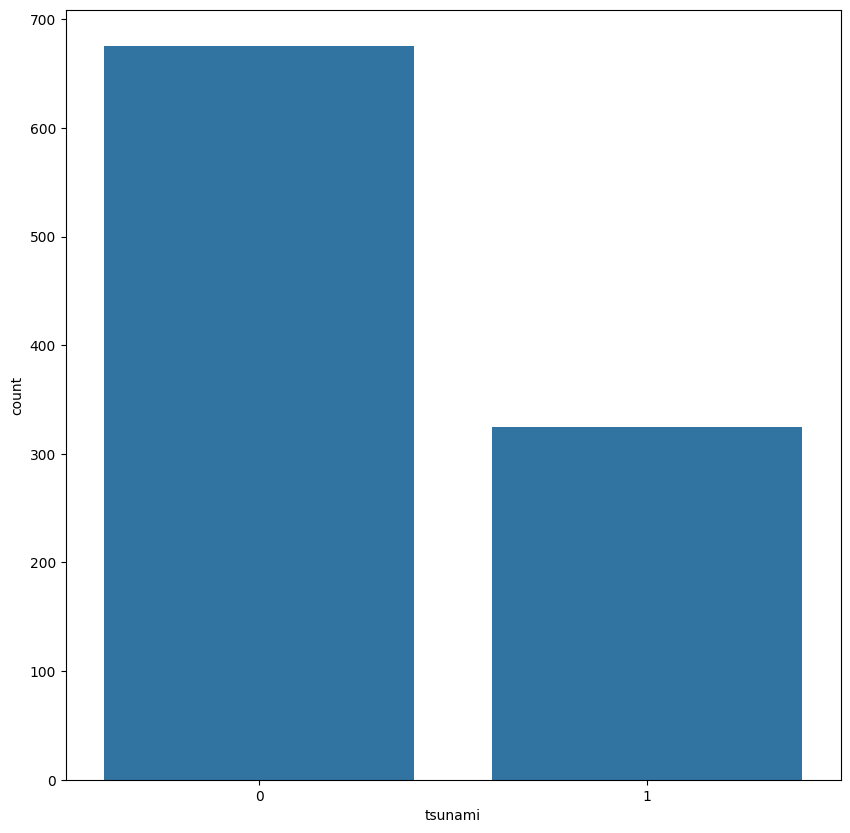

In [ ]:
# tsunami

plt.figure(figsize = (10,10))
sns.countplot(data = df , x = 'tsunami')

majority of the events occurred in non-oceanic regions.

<Axes: xlabel='magnitude', ylabel='sig'>

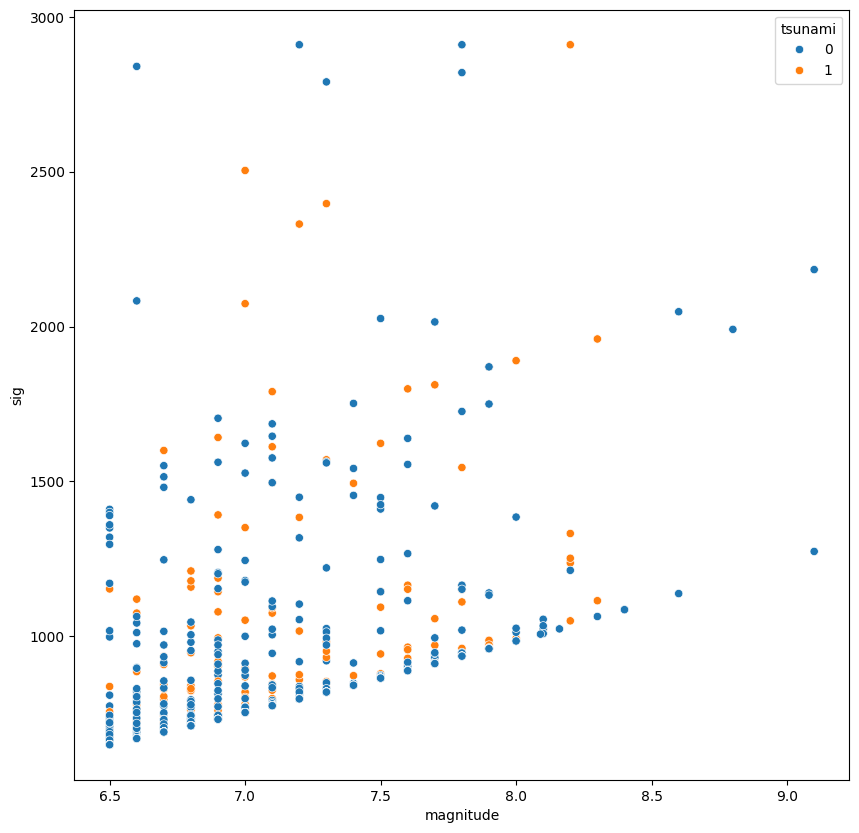

In [ ]:
# Eartquake by magnitude and sig

plt.figure(figsize = (10,10))
sns.scatterplot(data = df , x = 'magnitude' , y = 'sig' , hue = 'tsunami')

there appears to be a certain correlation b/w eartquake magnitude and depth, and tsunami occurence

<Axes: xlabel='magnitude', ylabel='depth'>

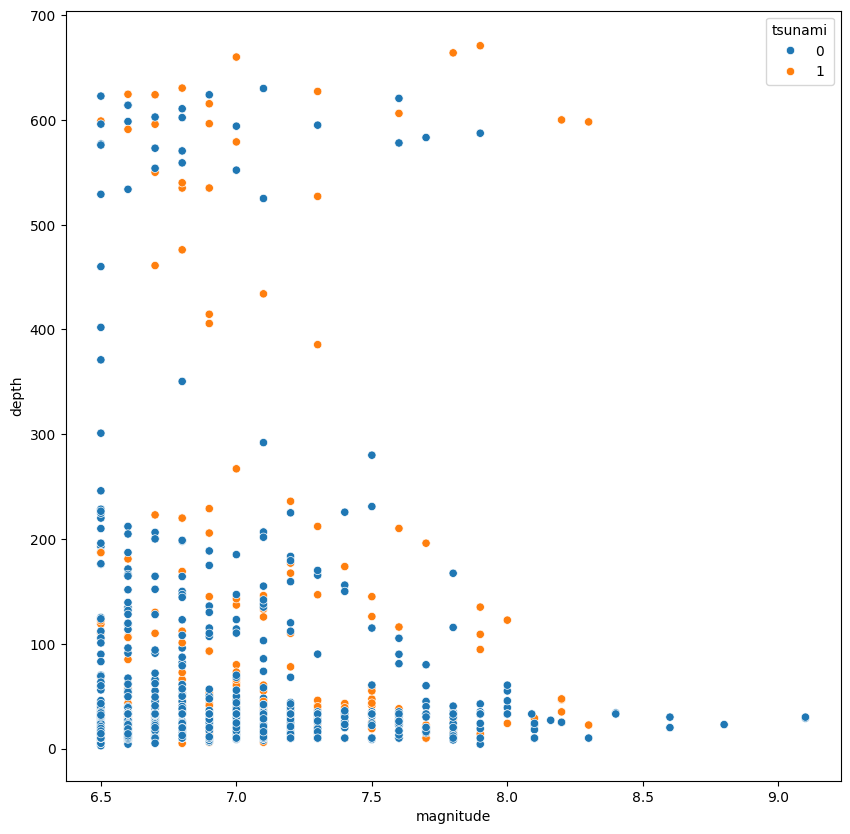

In [ ]:
# eartquake by magnitude and depth

plt.figure(figsize = (10,10))
sns.scatterplot(data = df , x = 'magnitude' , y = 'depth' , hue = 'tsunami')

there is no much relation b/w earthquake magnitude and depth, and tsunami occurence

<Axes: xlabel='tsunami', ylabel='count'>

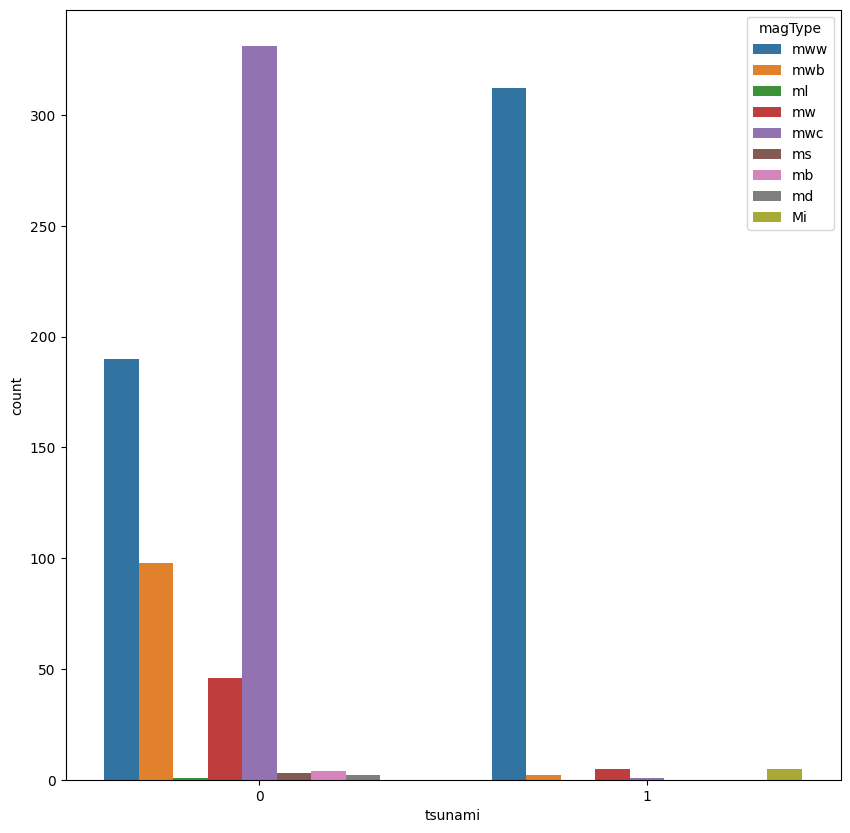

In [ ]:
# tsunami occurence by magnitude measurement

plt.figure(figsize = (10,10))
sns.countplot(data = df , x = 'tsunami' , hue = 'magType')

For earthquake occure in oceans, mww is comonly used measure type

on the other hand, mwc is the preferred measurement type for eartquake occuring on land

<Axes: xlabel='tsunami', ylabel='count'>

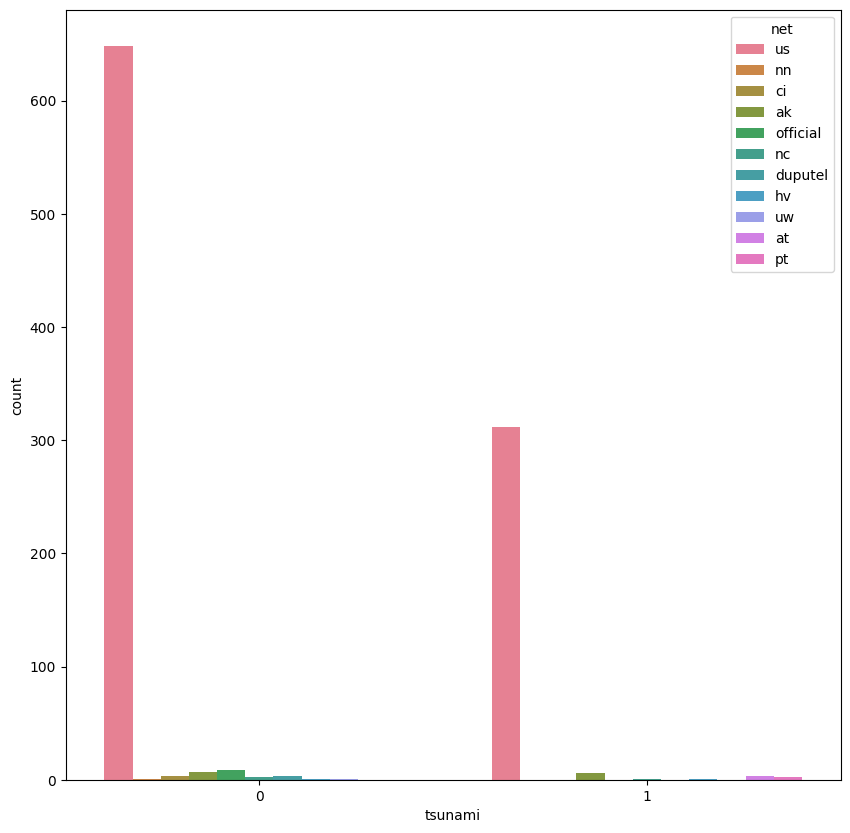

In [ ]:
# tsunami occurence by contributors

plt.figure(figsize = (10,10))
sns.countplot(data = df , x = 'tsunami' , hue = 'net')

For tsunami occurence in ocean and non-ocean region, us represents the most preferred data contributors

In [ ]:
df.isnull().sum()[df.isnull().sum()>0]

,0
alert,551
location,6
continent,716
country,349


In [ ]:
df['location'].unique()

array(['Sola, Vanuatu', 'Intipucá, El Salvador', 'Loncopué, Argentina',
       'Sand Point, Alaska', 'Alaska Peninsula',
       'Codrington, Antigua and Barbuda', 'Tonga', 'the Fiji Islands',
       'Panama-Colombia border region', 'the Loyalty Islands',
       'Hihifo, Tonga', 'Teluk Dalam, Indonesia',
       'Kermadec Islands, New Zealand', 'Tuban, Indonesia',
       'the Kamchatka Peninsula, Russia', 'New Guinea, Papua New Guinea',
       'San Antonio de los Cobres, Argentina', 'Jurm, Afghanistan',
       'Ecuador', 'Kermadec Islands region', 'Port-Olry, Vanuatu',
       'Kimbe, Papua New Guinea', 'Murghob, Tajikistan',
       'Ekinözü, Turkey', 'Nurdağı, Turkey', 'Central Turkey', nan,
       'Tobelo, Indonesia', 'Pulau Pulau Tanimbar, Indonesia', 'Vanuatu',
       'Malango, Solomon Islands', 'Bengkulu, Indonesia', 'Neiafu, Tonga',
       'Boca Chica, Panama', 'Aguililla, Mexico', 'Yujing, Taiwan',
       'Lugu, Taiwan', 'Isangel, Vanuatu', 'Kainantu, Papua New Guinea',
       'Kan

In [ ]:
l_r = df['location'].str.split(pat = ',' , n = 1 , expand = True)
l_r.head()

,0,1
0,Sola,Vanuatu
1,Intipucá,El Salvador
2,Loncopué,Argentina
3,Sand Point,Alaska
4,Alaska Peninsula,None


In [ ]:
df['country'] = df['country'].fillna(l_r[1])

In [ ]:
df.isnull().sum()[df.isnull().sum()>0]

,0
alert,551
location,6
continent,716
country,54


In [ ]:
df['location'] = df['country'].fillna('unknown')

In [ ]:
df.isnull().sum()[df.isnull().sum()>0]

,0
alert,551
continent,716
country,54


In [ ]:
df['country'] = df['country'].fillna(df['location'])

In [ ]:
df.isnull().sum()[df.isnull().sum()>0]

,0
alert,551
continent,716


In [ ]:
df['country'].unique()

array(['Vanuatu', ' El Salvador', 'Argentina', ' Alaska', 'unknown',
       ' Antigua and Barbuda', 'Colombia', ' Tonga', 'Indonesia',
       ' New Zealand', 'Russian Federation (the)', 'Papua New Guinea',
       'Afghanistan', 'Ecuador', ' Vanuatu', 'Tajikistan', 'Turkiye',
       'Solomon Islands', ' Indonesia', 'Fiji', 'Panama', 'Mexico',
       'Taiwan', "People's Republic of China", 'Philippines', 'Brazil',
       'Peru', ' Nicaragua', ' New Caledonia', ' Japan', ' Cyprus',
       'United States of America', 'Antarctica', 'Haiti', ' Philippines',
       ' Panama', ' Wallis and Futuna', 'Japan', ' Russia', 'Mongolia',
       ' Chile', 'Greece', 'Chile', ' Solomon Islands', ' Greece',
       'Russia', ' Jamaica', 'Turkey', ' Fiji',
       'United Kingdom of Great Britain and Northern Ireland (the)',
       ' Australia', ' South Sandwich Islands',
       'South Georgia and the South Sandwich Islands',
       ' Svalbard and Jan Mayen', ' Canada', 'Venezuela', 'Bolivia',
       ' Hondu

In [ ]:
df['country'] = df['country'].apply(lambda x: x.strip() if isinstance(x , str) else x)

In [ ]:
df['country'].unique()

array(['Vanuatu', 'El Salvador', 'Argentina', 'Alaska', 'unknown',
       'Antigua and Barbuda', 'Colombia', 'Tonga', 'Indonesia',
       'New Zealand', 'Russian Federation (the)', 'Papua New Guinea',
       'Afghanistan', 'Ecuador', 'Tajikistan', 'Turkiye',
       'Solomon Islands', 'Fiji', 'Panama', 'Mexico', 'Taiwan',
       "People's Republic of China", 'Philippines', 'Brazil', 'Peru',
       'Nicaragua', 'New Caledonia', 'Japan', 'Cyprus',
       'United States of America', 'Antarctica', 'Haiti',
       'Wallis and Futuna', 'Russia', 'Mongolia', 'Chile', 'Greece',
       'Jamaica', 'Turkey',
       'United Kingdom of Great Britain and Northern Ireland (the)',
       'Australia', 'South Sandwich Islands',
       'South Georgia and the South Sandwich Islands',
       'Svalbard and Jan Mayen', 'Canada', 'Venezuela', 'Bolivia',
       'Honduras', 'Costa Rica', 'Iran', 'Russia region',
       'New Zealand region', 'Guatemala', 'Botswana', 'California',
       'Italy', 'Myanmar', 'North

**Quakes by Country**

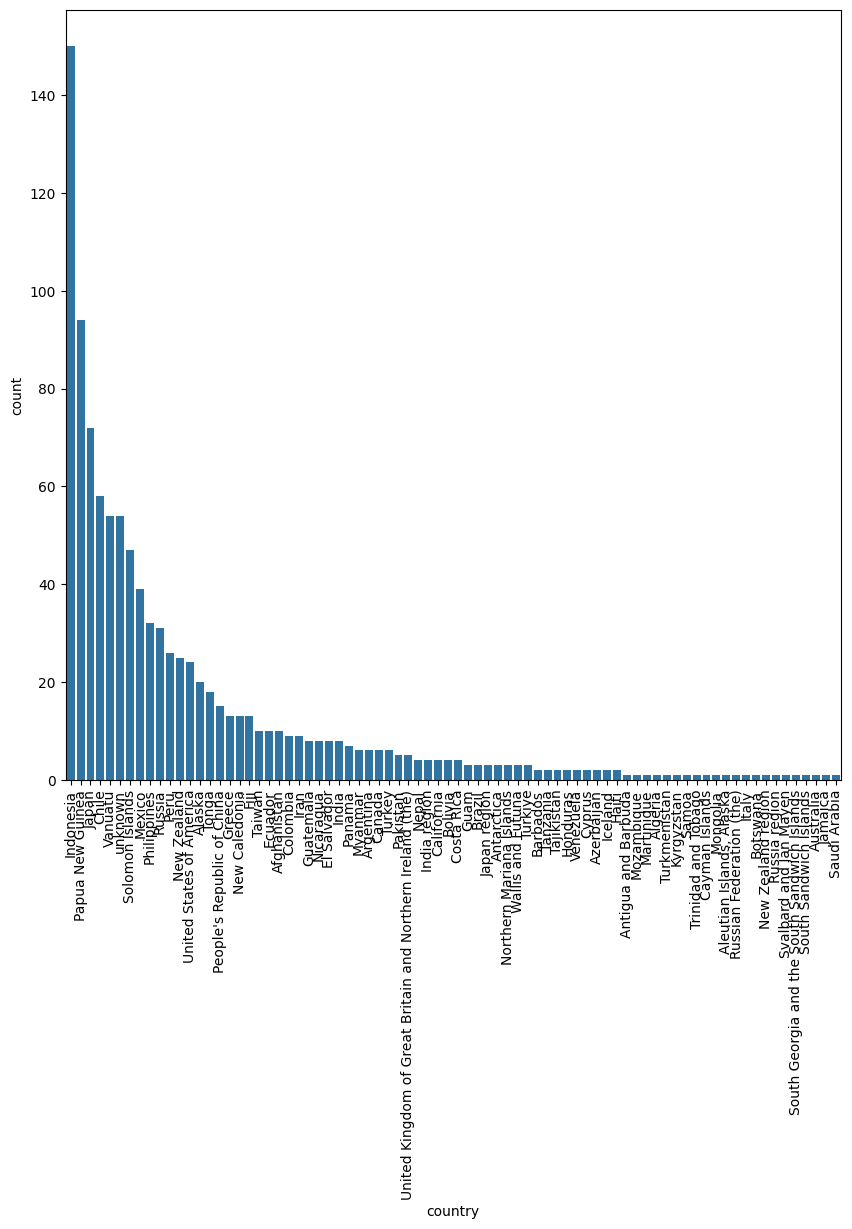

In [ ]:
plt.figure(figsize = (10,10))
sns.countplot(data= df , x = 'country' , order = df['country'].value_counts().index)
plt.xticks(rotation = 90);

**Quake by Country - 20**

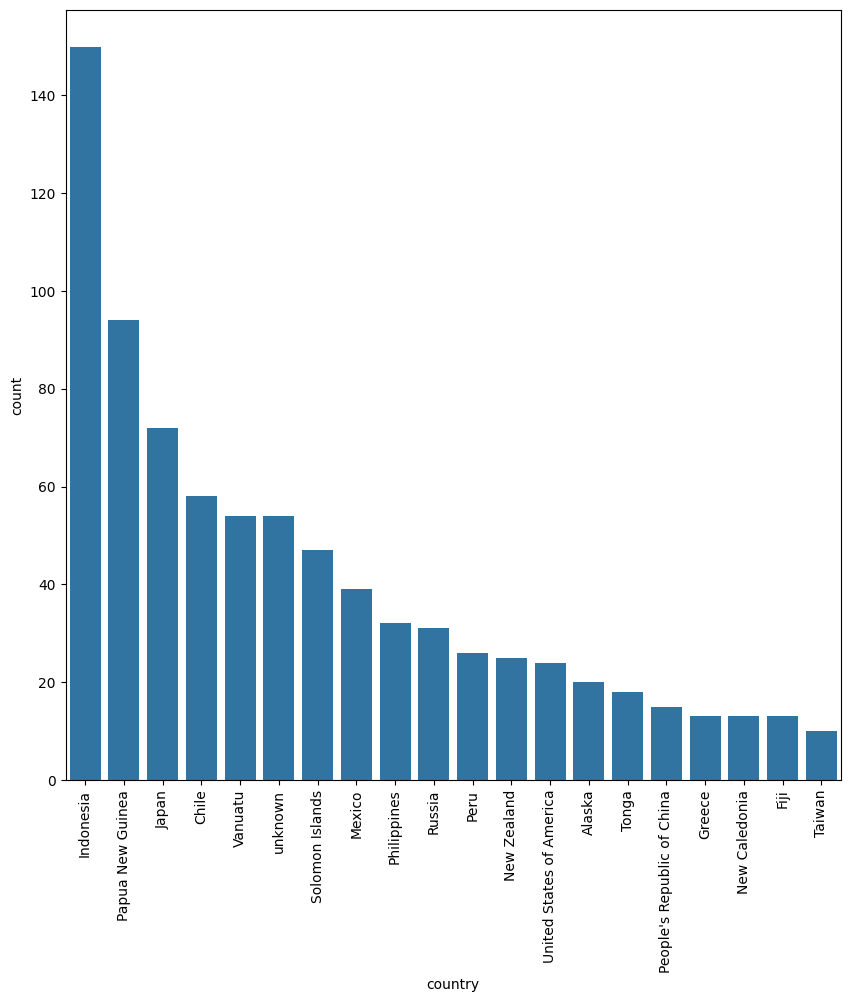

In [ ]:
plt.figure(figsize = (10,10))
sns.countplot(data= df , x = 'country' , order = df['country'].value_counts().head(20).index)
plt.xticks(rotation = 90);

Top 3 countries with high rate of eartquake

1. Indonesia
2. Papua New Guinea
3. Japan

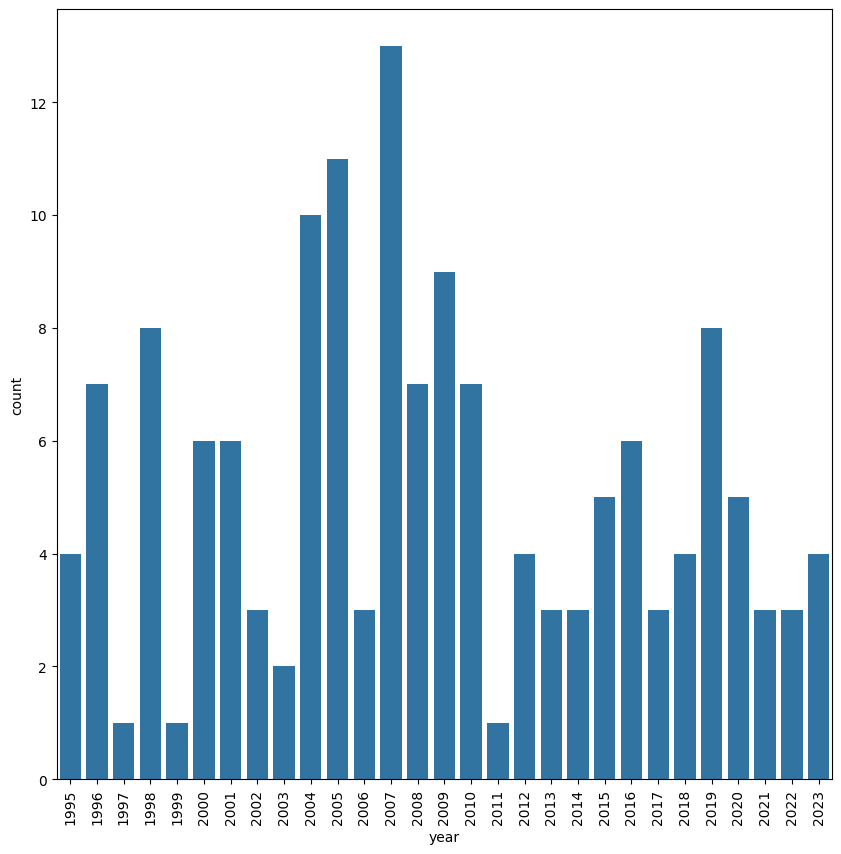

In [ ]:
# eartquake by year - indonesia

plt.figure(figsize = (10,10))
sns.countplot(data = df[df['country']=='Indonesia'] , x = 'year')
plt.xticks(rotation = 90);

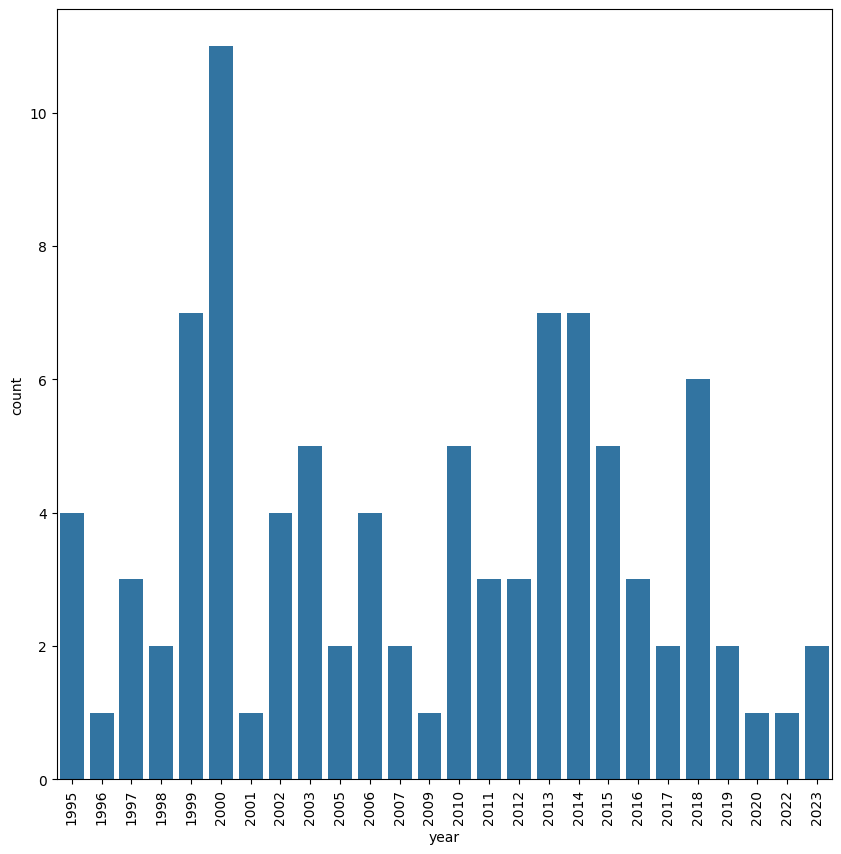

In [ ]:
# eartquake by year - Papua New Guinea

plt.figure(figsize = (10,10))
sns.countplot(data = df[df['country']=="Papua New Guinea"] , x = 'year')
plt.xticks(rotation = 90);

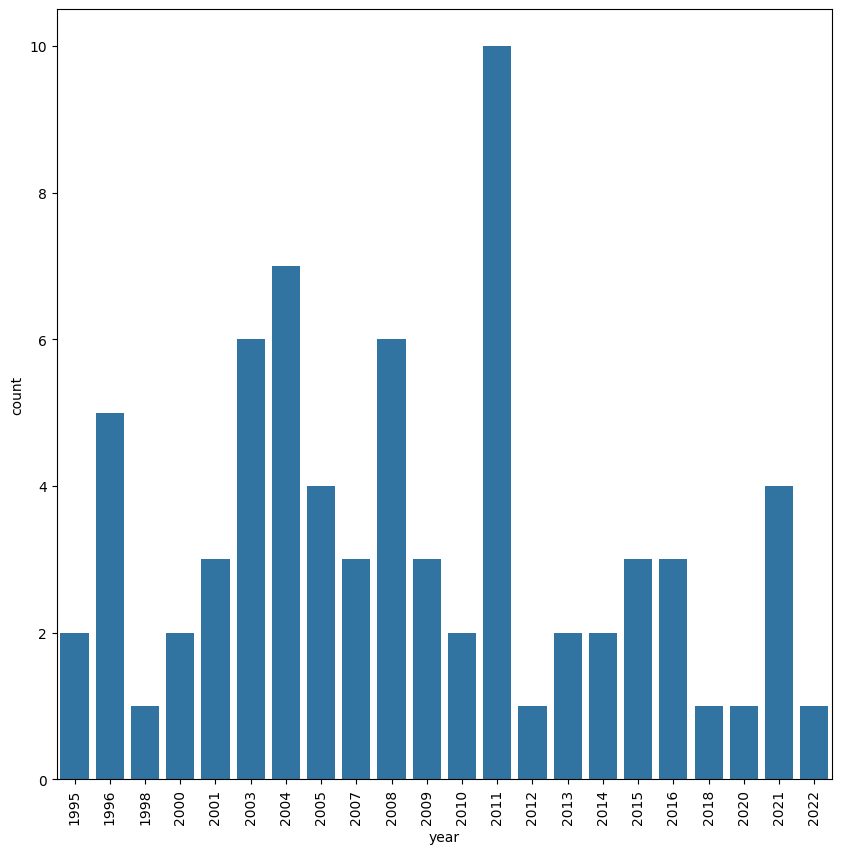

In [ ]:
# eartquake by year - Japan

plt.figure(figsize = (10,10))
sns.countplot(data = df[df['country']=="Japan"] , x = 'year')
plt.xticks(rotation = 90);

<Axes: title={'center': 'Eartquake by Tsunami occurence - Indonesia'}, ylabel='count'>

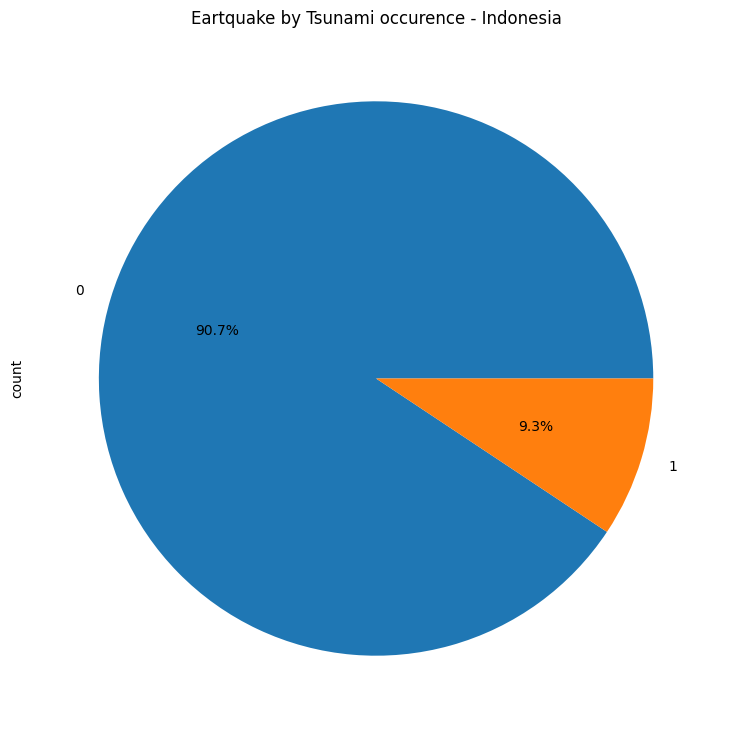

In [ ]:
plt.figure(figsize = (9,9))
plt.title("Eartquake by Tsunami occurence - Indonesia")
df[df['country']=='Indonesia']['tsunami'].value_counts().plot(kind = 'pie' , autopct = '%1.1f%%')

<Axes: title={'center': 'Eartquake by Tsunami occurence - Papua New Guinea'}, ylabel='count'>

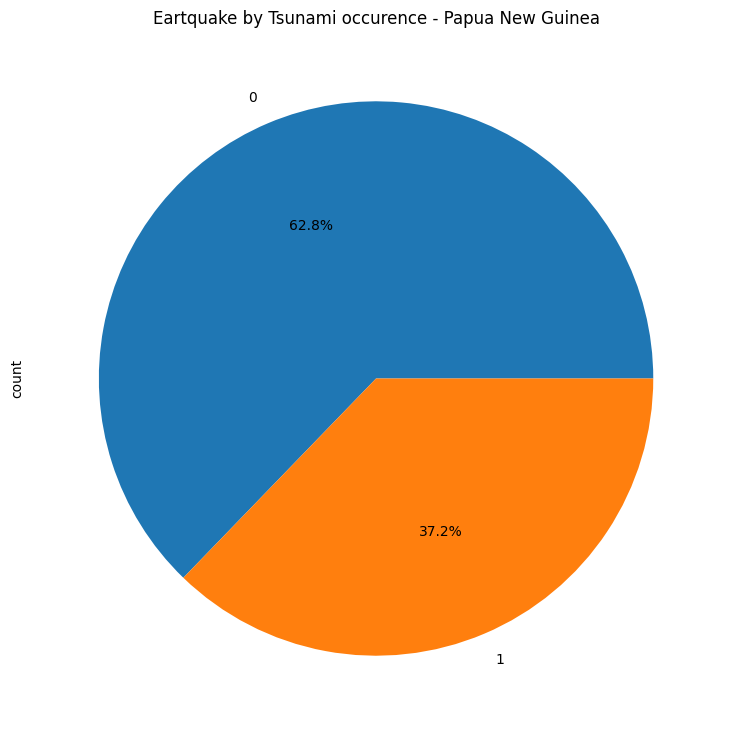

In [ ]:
plt.figure(figsize = (9,9))
plt.title("Eartquake by Tsunami occurence - Papua New Guinea")
df[df['country']=='Papua New Guinea']['tsunami'].value_counts().plot(kind = 'pie' , autopct = '%1.1f%%')

<Axes: title={'center': 'Eartquake by Tsunami occurence - Japan'}, ylabel='count'>

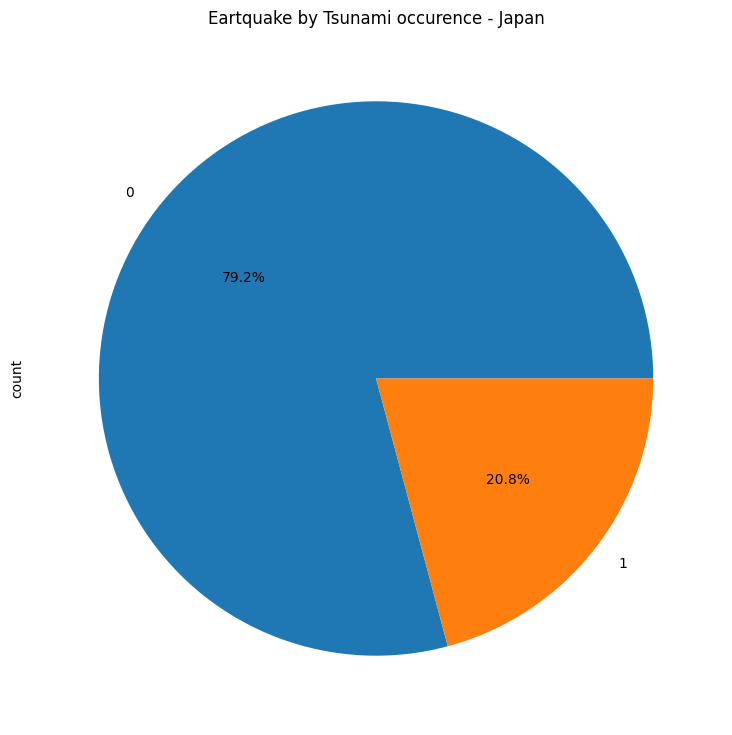

In [ ]:
plt.figure(figsize = (9,9))
plt.title("Eartquake by Tsunami occurence - Japan")
df[df['country']=='Japan']['tsunami'].value_counts().plot(kind = 'pie' , autopct = '%1.1f%%')